In [3]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv('JAPAN2024_filtered_converted.csv')

# Define a regular expression pattern to match the 'MMM-DD' format (e.g., Jan-07)
pattern = r'^[A-Za-z]{3}-\d{2}$'

# Filter rows that match the pattern
df_filtered = df[df['time stamp'].apply(lambda x: bool(re.match(pattern, x)))]

# Convert the valid 'MMM-DD' format to a standardized 'YYYY-MM-DD' format (assuming the year is 2024)
df_filtered['time stamp'] = pd.to_datetime(df_filtered['time stamp'] + '-2024', format='%b-%d-%Y')

# Save the updated dataframe to a new CSV
output_path = 'JAPAN2024_filtered_converted.csv'
df_filtered.to_csv(output_path, index=False)

# Display the first few rows to confirm changes
df_filtered.head()


,id,text,time stamp


In [12]:
import matplotlib.pyplot as plt

In [17]:
from datetime import timedelta

# Find the earliest tweet date
earliest_date = df_filtered['time stamp'].min()

# Define the time window (one week from the earliest tweet)
end_date = earliest_date + timedelta(days=10)

# Filter the data within this period
df_week = df_filtered[(df_filtered['time stamp'] >= earliest_date) & (df_filtered['time stamp'] <= end_date)]

# Group the data by the 'time stamp' column to get the frequency count for the week
date_counts_week = df_week['time stamp'].value_counts().sort_index()


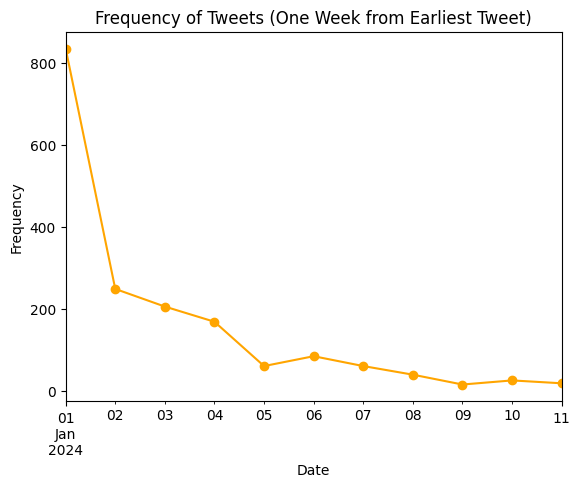

In [19]:
# Plot the frequency of tweets within one week of the earliest tweet using a line graph
plt.figure(figsize=(10,6))
date_counts_week.plot(kind='line', marker='o', color='orange')
plt.title('Frequency of Tweets (One Week from Earliest Tweet)')
plt.xlabel('Date')
plt.ylabel('Frequency')


# Show the plot
plt.show()


In [21]:
# Drop duplicate rows based on 'id', 'text', and 'time stamp'
df_unique = df_filtered.drop_duplicates(subset=['id', 'text', 'time stamp'])

# Save the cleaned dataframe to a new CSV
df_unique.to_csv('JAPAN2024_cleaned.csv', index=False)

# Display the first few rows to confirm
df_unique.head()


,id,text,time stamp
0,@EN_NERV,"Major Tsunami Warning – 1/1, 4:22pm The Tsunam...",2024-01-01
1,@mondoterremoti,"Utilizzando i dati preliminari dell'USGS, @se...",2024-01-06
2,@MacLesggy,Comment une construction antisismique se compo...,2024-01-03
3,@Masabxpct,magnitude7.4 strong earthquake #地震 #earthquak...,2024-01-01
4,@Ryo_Saeba_3,Une nouvelle vidéo prise au moment du séisme d...,2024-02-03


In [22]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1083 entries, 0 to 3787
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          1083 non-null   object        
 1   text        1011 non-null   object        
 2   time stamp  1083 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 33.8+ KB


In [23]:
earliest_date = df_unique['time stamp'].min()

# Define the time window (one week from the earliest tweet)
end_date = earliest_date + timedelta(days=10)

# Filter the data within this period
df_week = df_unique[(df_unique['time stamp'] >= earliest_date) & (df_unique['time stamp'] <= end_date)]

# Group the data by the 'time stamp' column to get the frequency count for the week
date_counts_week = df_week['time stamp'].value_counts().sort_index()


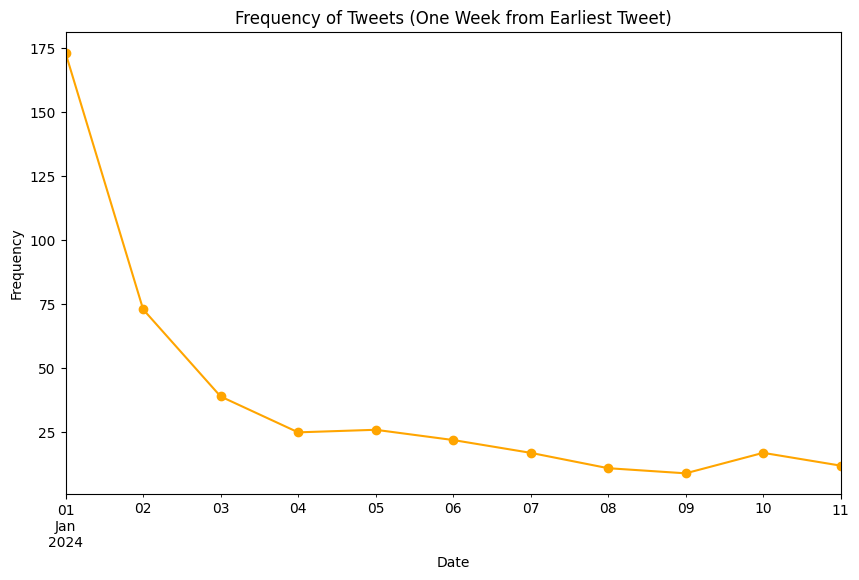

In [24]:
plt.figure(figsize=(10,6))
date_counts_week.plot(kind='line', marker='o', color='orange')
plt.title('Frequency of Tweets (One Week from Earliest Tweet)')
plt.xlabel('Date')
plt.ylabel('Frequency')


# Show the plot
plt.show()